Utilizzate la linear regression multipla per analizzare il dataframe a questo link https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction utilizzate i dati sulle età delle case e la distanza dalla metro per prevedere il costo della casa , allenate l'algoritmo, testatelo e poi realizzate i vari grafici

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df_or = pd.read_csv("Real estate.csv", index_col=0)
df_or.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [3]:
X_or = df_or[["X2 house age","X3 distance to the nearest MRT station"]]
scler = StandardScaler()
X = scler.fit_transform(X_or)
y = df_or["Y house price of unit area"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.coef_)

mse = mean_squared_error(y_test, y_pred)
print("R^2", r2_score(y_test, y_pred))
print("MSE:", mse)

[-2.42149914 -8.7375658 ]
R^2 0.49349237676037583
MSE: 92.83663166334082


In [5]:
age_mean = X_test[:,0].mean()
distance_mean = X_test[:,1].mean()

In [6]:
x_vals1 = np.linspace(X_test[:,0].min(), X_test[:,0].max(), 100)
X_input1 = np.column_stack((x_vals1, np.full_like(x_vals1, distance_mean)))
y_vals1 = model.predict(X_input1)

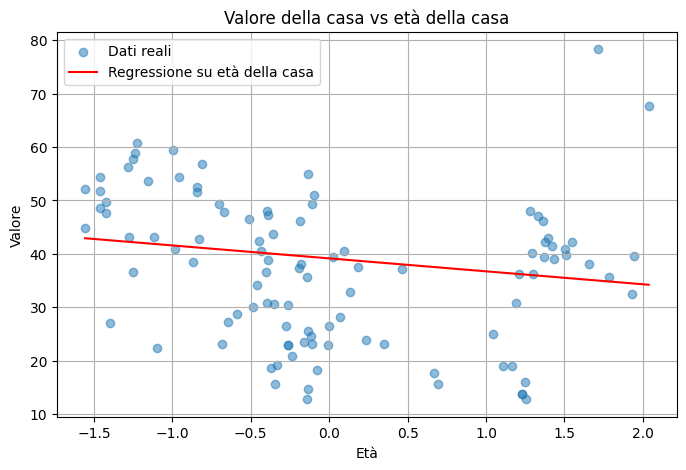

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:,0], y_test, alpha=0.5, label="Dati reali")
plt.plot(x_vals1, y_vals1, color="red", label="Regressione su età della casa")
plt.xlabel("Età")
plt.ylabel("Valore")
plt.title("Valore della casa vs età della casa")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
x_vals2 = np.linspace(X_test[:,1].min(), X_test[:,1].max(), 100)
X_input2 = np.column_stack((x_vals2, np.full_like(x_vals2, age_mean)))
y_vals2 = model.predict(X_input2)

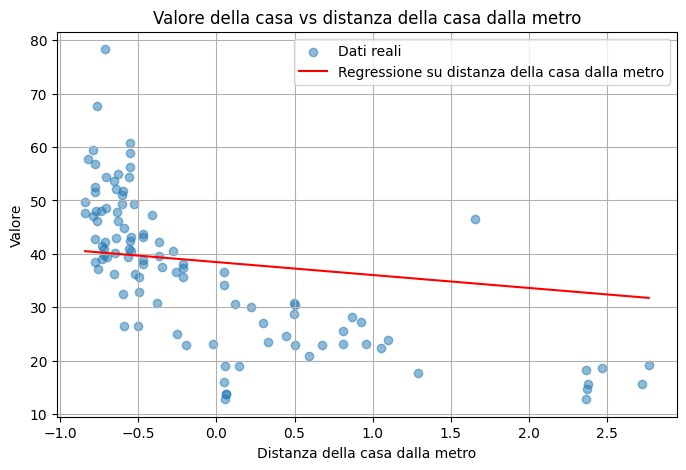

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:,1], y_test, alpha=0.5, label="Dati reali")
plt.plot(x_vals2, y_vals2, color="red", label="Regressione su distanza della casa dalla metro")
plt.xlabel("Distanza della casa dalla metro")
plt.ylabel("Valore")
plt.title("Valore della casa vs distanza della casa dalla metro")
plt.legend()
plt.grid(True)
plt.show()